#  Shortlisting the Top UCL Winning Teams


For UCLAnalysis.ipynb I worked on analysing the most dominant UEFA Champions League Winning Team ever but before I did that I had to pool the teams to a final 5. To make sure it wasn't biased I wanted to decide through picking the top 5 unanimous **BEST** so I decided to rake in the decisions made by sports outlets and see what teams have appeared the most.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After importing the relavant libraries I needed to use Pandas libraries to build a DataFrame of the teams along with the sports outlets that list them.

In [16]:
TeamLists = [
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "BBC"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "BBC"},
    {"Team": "Real Madrid 01/02", "Year": 2002, "Source": "BBC"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "BBC"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "BBC"},
    {"Team": "Ajax 94/95", "Year": 1995, "Source": "BBC"},
    {"Team": "Barcelona 14/15", "Year": 2015, "Source": "BBC"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "BBC"},
    {"Team": "Bayern Munich 12/13", "Year": 2013, "Source": "BBC"},
    {"Team": "AC Milan 06/07", "Year": 2007, "Source": "BBC"},
    {"Team": "Man City 22/23", "Year": 2023, "Source": "BBC"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "BBC"},
    {"Team": "Man City 22/23", "Year": 2023, "Source": "GQ"},
    {"Team": "Real Madrid 21/22", "Year": 2022, "Source": "GQ"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "GQ"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "GQ"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "GQ"},
    {"Team": "Real Madrid 16/17", "Year": 2017, "Source": "GQ"},
    {"Team": "Barcelona 14/15", "Year": 2015, "Source": "GQ"},
    {"Team": "Bayern Munich 12/13", "Year": 2013, "Source": "GQ"},
    {"Team": "Chelsea 11/12", "Year": 2012, "Source": "GQ"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "GQ"},
    {"Team": "Inter Milan 09/10", "Year": 2010, "Source": "GQ"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "GQ"},
    {"Team": "Man Utd 07/08", "Year": 2008, "Source": "GQ"},
    {"Team": "AC Milan 06/07", "Year": 2007, "Source": "GQ"},
    {"Team": "Liverpool 04/05", "Year": 2005, "Source": "GQ"},
    {"Team": "Porto 03/04", "Year": 2004, "Source": "GQ"},
    {"Team": "AC Milan 02/03", "Year": 2003, "Source": "GQ"},
    {"Team": "Real Madrid 01/02", "Year": 2002, "Source": "GQ"},
    {"Team": "Bayern Munich 00/01", "Year": 2001, "Source": "GQ"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "GQ"},
    {"Team": "Real Madrid 99/00", "Year": 2000, "Source": "FourFourTwo"},
    {"Team": "Man Utd 07/08", "Year": 2008, "Source": "FourFourTwo"},
    {"Team": "Real Madrid 16/17", "Year": 2017, "Source": "FourFourTwo"},
    {"Team": "Ajax 94/95", "Year": 1995, "Source": "FourFourTwo"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "FourFourTwo"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "FourFourTwo"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "FourFourTwo"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "FourFourTwo"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "FourFourTwo"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "FourFourTwo"},
    {"Team": "Paris Saint-Germain 24/25", "Year": 2025, "Source": "FourFourTwo"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "GiveMeSport"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "GiveMeSport"},
    {"Team": "Man Utd 07/08", "Year": 2008, "Source": "GiveMeSport"},
    {"Team": "Real Madrid 16/17", "Year": 2017, "Source": "GiveMeSport"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "GiveMeSport"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "GiveMeSport"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "GiveMeSport"},
    {"Team": "AC Milan 06/07", "Year": 2007, "Source": "GiveMeSport"},
    {"Team": "Barcelona 14/15", "Year": 2015, "Source": "GiveMeSport"},
    {"Team": "Real Madrid 13/14", "Year": 2014, "Source": "GiveMeSport"},
    {"Team": "Inter Milan 09/10", "Year": 2010, "Source": "GiveMeSport"},
    {"Team": "Ajax 94/95", "Year": 1995, "Source": "GiveMeSport"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "GiveMeSport"},
    {"Team": "Man City 22/23", "Year": 2023, "Source": "GiveMeSport"},
    {"Team": "Real Madrid 01/02", "Year": 2002, "Source": "GiveMeSport"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "90min"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "90min"},
    {"Team": "Real Madrid 16/17", "Year": 2017, "Source": "90min"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "90min"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "90min"},
    {"Team": "Ajax 94/95", "Year": 1995, "Source": "90min"},
    {"Team": "Bayern Munich 12/13", "Year": 2013, "Source": "90min"},
    {"Team": "Inter Milan 09/10", "Year": 2010, "Source": "90min"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "90min"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "90min"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "LenteDesportiva"},
    {"Team": "Barcelona 14/15", "Year": 2015, "Source": "LenteDesportiva"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "LenteDesportiva"},
    {"Team": "Man Utd 98/99", "Year": 1999, "Source": "LenteDesportiva"},
    {"Team": "AC Milan 06/07", "Year": 2007, "Source": "LenteDesportiva"},
    {"Team": "Liverpool 18/19", "Year": 2019, "Source": "LenteDesportiva"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "LenteDesportiva"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "LenteDesportiva"},
    {"Team": "Man City 22/23", "Year": 2023, "Source": "LenteDesportiva"},
    {"Team": "Real Madrid 17/18", "Year": 2018, "Source": "Sportskeeda"},
    {"Team": "Bayern Munich 19/20", "Year": 2020, "Source": "Sportskeeda"},
    {"Team": "Man Utd 07/08", "Year": 2008, "Source": "Sportskeeda"},
    {"Team": "Barcelona 08/09", "Year": 2009, "Source": "Sportskeeda"},
    {"Team": "Barcelona 10/11", "Year": 2011, "Source": "Sportskeeda"},
]

TeamsRanked = pd.DataFrame(TeamLists)

## Citations

* **BBC Sport:** [Who had the best Champions League-winning team?](https://www.bbc.co.uk/sport/football/articles/cn9l0vy0j30o)
* **GQ Magazine:** [The top ten Champions League winning teams, ranked: from Liverpool's Istanbul heroes to Real Madrid's Galacticos - By David Taylor](https://www.gq-magazine.co.uk/lifestyle/article/best-champions-league-teams-ranked)
* **FourFourTwo:** [Ranked! EVERY team to have won the Champions League, from worst to best By Steven Chicken](https://www.fourfourtwo.com/features/best-teams-win-champions-league)
* **GiveMeSport:** [9 Greatest Champions League Teams in History (Ranked) By Alex Mitton](https://www.givemesport.com/champions-league-best-teams-ever-ranked/)
* **90min:** [Every UEFA Champions League winning team - ranked - By Tom Gott](https://www.90min.com/posts/every-uefa-champions-league-winning-team-ranked)
* https://www.sportskeeda.com/football/5-greatest-uefa-champions-league-teams-time 
* **Sportskeeda:** [5 greatest UEFA Champions League teams of all time By Oliver Obel](https://www.sportskeeda.com/football/5-greatest-uefa-champions-league-teams-time)  
* **LenteDesportiva:** [The 9 Greatest Champions League Teams of All Time By Sai Teja](https://lentedesportiva.com/the-9-greatest-champions-league-teams-of-all-time/)

Now with the TeamsList as a DataFrame set up I needed to visualise the data as a barplot so I could see which one was the most popular.

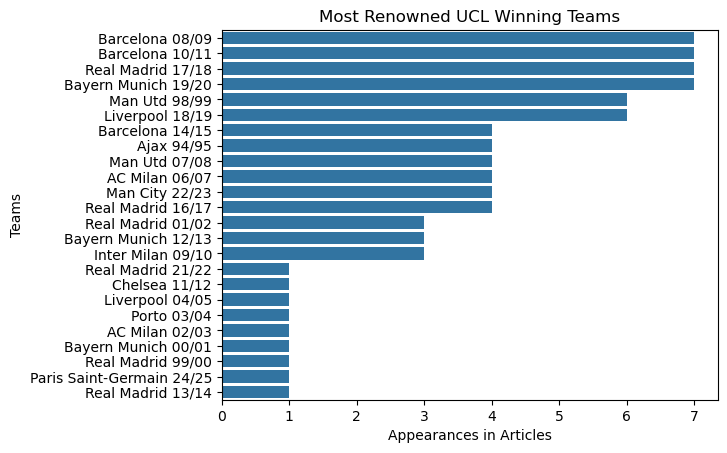

In [19]:
sns.countplot(y='Team', data=TeamsRanked, order=TeamsRanked['Team'].value_counts().index)
plt.title("Most Renowned UCL Winning Teams")
plt.xlabel("Appearances in Articles")
plt.ylabel("Teams")
plt.show()

Due to their representation in the graph I saw that the "greatest" 4 teams were:

- **Barcelona 08/09**
- **Barcelona 10/11**
- **Bayern Munich 19/20**
- **Real Madrid 17/18**

I thought I would end with a Top 5 here but I believed it would be biased to pick another team to make it 5 and it would be more refined if I covered a smaller circle of teams so these were the teams I chose to analyse.

**However** when looking at the Fbref database I seen that modern metric [xG(Expected Goals), xGA(Expected Goals Against), Progressive Passes, etc] don't truly appear until the 2018/2019 season. Although they aren't vital for the analysis, I thought it would be useful to analyse even if it was for merely the modern era.

Therefore I filtered the data to create a new DataFrame for teams after xG was introduced.  

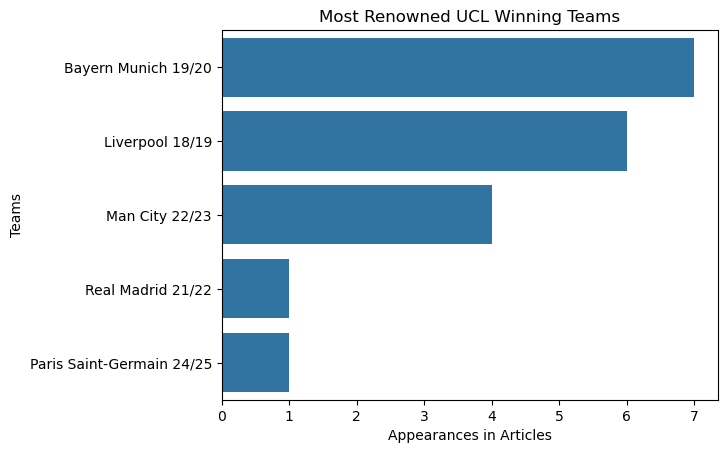

In [21]:
ModernTeams = TeamsRanked.loc[TeamsRanked['Year'] >= 2019]

sns.countplot(y='Team', data=ModernTeams, order=ModernTeams['Team'].value_counts().index)
plt.title("Most Renowned UCL Winning Teams")
plt.xlabel("Appearances in Articles")
plt.ylabel("Teams")
plt.show()